In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib
matplotlib.rcParams['figure.facecolor'] = 'w'

In [3]:
from decodanda import *
np.random.seed(1123)



### First example: simplest random data
One behavioral 1000 x 1 variable (Position) and a random 1000 x 33 neural recordings matrix\
 \
We use lambdas to select *top* and *bottom* positions, defining two classes that we will try to decode.



In [4]:

session = {
    'Neural Data': np.random.rand(1000, 33),
    'Position': np.random.rand(1000) * 10,
    'Trial': [0,0,0,0, 1,1,1,1]
}

conditions = {                                      # Names of the variable and of the conditions can be anything,
    'Corner': {                                    # they are used for visualization purposes only
        'Top': lambda d: d['Position'] > 9,
        'Bottom': lambda d: d['Position'] < 1
    },
}

In [17]:
# Create a decodanda object by applying these conditions to the data

mydec = Decodanda(sessions=session,
                  semantic_conditions=conditions,
                  neural_attr='Neural Data',
                  verbose=True, decoder=)

		[Decodanda]	building conditioned rasters for session 0
			(Corner = Top):	Selected 95 time bin out of 1000, divided into 89 trials 
			(Corner = Bottom):	Selected 77 time bin out of 1000, divided into 73 trials 




#### The decode() method
takes a few parameters like training fraction and number of cross validation folds, as well as the number of null model shuffles for assessing the null distribution.\
 \
We expect chance as we used random data.

In [18]:
data, null = mydec.decode(training_fraction=0.7, cross_validations=4, nshuffles=10)
print(data, null)
# np.nanmean(mydec.decoding_weights_null['Corner'], 0).shape
#mydec.decoding_weights_null




Testing decoding performance for semantic dichotomy:  Corner
[decode_dichotomy] Decoding with 95 time bins for 33 neurons from 1 brains - iteration 1 of 4
		(Bottom)
			vs.				Performance: 0.447
		(Top)

[decode_dichotomy] Decoding with 95 time bins for 33 neurons from 1 brains - iteration 2 of 4
		(Bottom)
			vs.				Performance: 0.379
		(Top)

[decode_dichotomy] Decoding with 95 time bins for 33 neurons from 1 brains - iteration 3 of 4
		(Bottom)
			vs.				Performance: 0.389
		(Top)

[decode_dichotomy] Decoding with 95 time bins for 33 neurons from 1 brains - iteration 4 of 4
		(Bottom)
			vs.				Performance: 0.453
		(Top)

		[decode_with_nullmodel]		----- Data: <p> = 0.42 -----

		[decode_with_nullmodel]		----- Random model iteration: 1 out of 10, <p> = 0.50 -----
		[decode_with_nullmodel]		----- Random model iteration: 2 out of 10, <p> = 0.57 -----
		[decode_with_nullmodel]		----- Random model iteration: 3 out of 10, <p> = 0.51 -----
		[decode_with_nullmodel]		----- Random model it

array([[[ 0.43161018,  0.11705466, -0.08471888, ...,  0.61927003,
         -0.24683972, -0.5822311 ],
        [ 1.11243253,  0.53462008, -0.63111093, ...,  0.10474731,
          0.77369432, -0.77888957],
        [ 0.48566298, -0.40683382, -0.00179179, ..., -0.2759409 ,
          0.21477177,  0.16032165],
        ...,
        [ 0.1291123 , -0.52749983, -0.35215075, ..., -0.25222459,
          0.25629182,  0.96731036],
        [-0.35377795,  0.71631194, -0.65004563, ...,  0.37554149,
          0.81232985,  0.29722549],
        [-0.03391772,  0.7238059 ,  0.18634435, ...,  0.22751265,
         -0.77381782,  0.3907582 ]],

       [[-0.57222521,  0.45225733, -0.78675327, ..., -0.05997094,
         -0.09073193,  0.6361197 ],
        [ 0.32002794,  0.10717234, -0.30784761, ...,  0.6740096 ,
          0.65714948, -0.41062914],
        [-0.79024485, -0.58843239,  0.73329159, ..., -0.54629056,
         -0.47509205, -0.1942019 ],
        ...,
        [ 0.83575119, -0.54911042,  1.04677958, ..., -

In [20]:
null = np.reshape(mydec.decoding_weights_null['Corner'], (n_shuffles, n_cross_val, n_neurons))
np.reshape(np.arange(10), (5, 2))


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])


### Pseudo-population
Pseudo-simultaneous arrays are automatically built when a list of sessions is specified instead of a single data set.\
Let's use two dummy random sessions just to prove the point.


In [9]:
# Pseudo-populations are built by giving a list of sessions instead of just one data set

session_1 = {
    'Neural Data': np.random.rand(500, 55),
    'Position': np.random.rand(500) * 10
}

session_2 = {
    'Neural Data': np.random.rand(800, 11),
    'Position': np.random.rand(800) * 10
}

mydec = Decodanda(sessions=[session, session_1, session_2],
                  semantic_conditions=conditions,
                  neural_attr='Neural Data',
                  verbose=True)


		[Decodanda]	building conditioned rasters for session 0
			(Corner = Top):	Selected 95 time bin out of 1000, divided into 89 trials 
			(Corner = Bottom):	Selected 77 time bin out of 1000, divided into 73 trials 


		[Decodanda]	building conditioned rasters for session 1
			(Corner = Top):	Selected 52 time bin out of 500, divided into 44 trials 
			(Corner = Bottom):	Selected 56 time bin out of 500, divided into 53 trials 


		[Decodanda]	building conditioned rasters for session 2
			(Corner = Top):	Selected 77 time bin out of 800, divided into 69 trials 
			(Corner = Bottom):	Selected 69 time bin out of 800, divided into 63 trials 





### De-coupling behavioral variables
To be sure that we are isolating one single variable in our decoding analysis (to the best of our knowledge), we can specify a list of conditions.\
 \
Every condition is a pair of conditioning functions that define the two values of the variable that we want to compare in the decoding analysis.\
 \
Each condition is treated independently and 2^n conditioned neural arrays are created by the intersection of all (n) conditioning functions.

In [10]:
# If more than one condition is specified, data are automatically balanced between dychotomies

data = {
    'Neural Data': np.random.rand(1000, 33),
    'Position': np.linspace(0, 10, 1000),
    'Context': np.random.rand(1000) > 0.2
}


conditions = {
    'Environment': {
        'A': lambda d: d['Context'] == 0,
        'B': lambda d: d['Context'] == 1
    },

    'Corner': {
        'Top': lambda d: d['Position'] > 9,
        'Bottom': lambda d: d['Position'] < 1
    },
}

mydec = Decodanda(sessions=data,
                  semantic_conditions=conditions,
                  neural_attr='Neural Data',
                  verbose=True)


		[Decodanda]	building conditioned rasters for session 0
			(Environment = A, Corner = Top):	Selected 21 time bin out of 1000, divided into 19 trials 
			(Environment = A, Corner = Bottom):	Selected 19 time bin out of 1000, divided into 14 trials 
			(Environment = B, Corner = Top):	Selected 79 time bin out of 1000, divided into 18 trials 
			(Environment = B, Corner = Bottom):	Selected 81 time bin out of 1000, divided into 15 trials 





### Example with meaningful synthetic data
Let's use meaningful data now:\
\
*FakeSession* is built with rotated concatenated populations selective to three variables: color, letter, and number. \
This gives a simple example of a population that has mixed selectivity with abstract representations.

In [11]:

from decodanda.utilities import FakeSession

s1 = FakeSession(n_neurons=150,
                 ndata=3000,
                 noise_amplitude=0.05,
                 coding_fraction=0.3,
                 rotate=True,
                 symplex=False)

conditions = {
        'number': {
            '1': lambda s: s.behaviour_number < 1.5,
            '2': lambda s: s.behaviour_number > 1.5
        },

        'letter': {
            'A': lambda s: s.behaviour_letter == 'A',
            'B': lambda s: s.behaviour_letter == 'B'
        }
    }

mydec = Decodanda(sessions=s1, semantic_conditions=conditions, verbose=True, neural_attr='raster')


		[Decodanda]	building conditioned rasters for session SessioneFinta1.0
			(number = 1, letter = A):	Selected 857 time bin out of 3000, divided into 53 trials 
			(number = 1, letter = B):	Selected 701 time bin out of 3000, divided into 57 trials 
			(number = 2, letter = A):	Selected 714 time bin out of 3000, divided into 42 trials 
			(number = 2, letter = B):	Selected 728 time bin out of 3000, divided into 48 trials 




/Users/lorenzo/Desktop/Research/Fusi Lab/decodanda/decodanda/utilities.py:209: ComplexWarning: Casting complex values to real discards the imaginary part
  self.raster[i, :] = np.dot(self.raster[i, :], M)



### Decoding dychotomies
The decodanda object exposes a decoding_dychotomy function that is at the core of all decoding routines.\
 \
A dychotomy is any binary balanced subdivision of the 2^n conditioned arrays, and can be specified by a list of semantic vectors\ 

for example, the dychotomy of the first specified condition is [[00, 01], [10, 11]]

In [13]:

number_dichotomy = [
    ['10', '11'],
    ['00', '01']
]

mydec.decode_dichotomy(number_dichotomy, training_fraction=0.7, cross_validations=1)


[decode_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains - iteration 1 of 1
		(2A) (2B)
			vs.				Performance: 0.827
		(1A) (1B)



array([0.82672112])


### User-friendly decoding interface for the semantic dychotomies
A dychotomy is hereby defined as *semantic* if it corresponds to a subdivision of one of the specified conditions (e.g., the one above).\
 \
The decodanda object exposes a *semantic_decode()* function that performs balanced cross-validated decoding of all the variables specified in the condition dictionary.



Testing decoding performance for semantic dychotomy:  Environment
[decode_dychotomy] Decoding with 81 time bins for 33 neurons from 1 brains - iteration 1 of 10
		(BTop) (BBottom)
			vs.				Performance: 0.497
		(ATop) (ABottom)

[decode_dychotomy] Decoding with 81 time bins for 33 neurons from 1 brains - iteration 2 of 10
		(BTop) (BBottom)
			vs.				Performance: 0.466
		(ATop) (ABottom)

[decode_dychotomy] Decoding with 81 time bins for 33 neurons from 1 brains - iteration 3 of 10
		(BTop) (BBottom)
			vs.				Performance: 0.349
		(ATop) (ABottom)

[decode_dychotomy] Decoding with 81 time bins for 33 neurons from 1 brains - iteration 4 of 10
		(BTop) (BBottom)
			vs.				Performance: 0.429
		(ATop) (ABottom)

[decode_dychotomy] Decoding with 81 time bins for 33 neurons from 1 brains - iteration 5 of 10
		(BTop) (BBottom)
			vs.				Performance: 0.503
		(ATop) (ABottom)

[decode_dychotomy] Decoding with 81 time bins for 33 neurons from 1 brains - iteration 6 of 10
		(BTop) (BBottom)
			v

({'Environment': 0.437037037037037, 'Corner': 0.41419753086419747},
 {'Environment': [0.554320987654321,
   0.4802469135802469,
   0.5280864197530865,
   0.49598765432098774,
   0.4648148148148149,
   0.4503086419753086,
   0.4654320987654321,
   0.5064814814814815,
   0.4793209876543211,
   0.48209876543209873],
  'Corner': [0.5114197530864197,
   0.5441358024691358,
   0.5148148148148148,
   0.49753086419753084,
   0.5305555555555557,
   0.4521604938271605,
   0.48364197530864195,
   0.5339506172839508,
   0.5555555555555556,
   0.47592592592592586]})

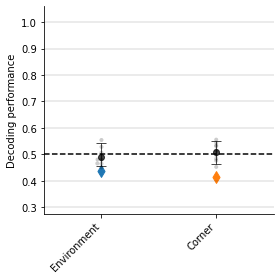

In [13]:

mydec.semantic_decode(training_fraction=0.7, plot=True, cross_validations=10, nshuffles=10)



### User-friendly CCGP interface for the semantic dychotomies
Same idea, but with cross-condition analysis


[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.772
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Performance: 0.818
		(1A) | (1B) 


Testing CCGP for semantic dichotomy:  number
[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.795
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Performance: 0.800
		(1A) | (1B) 

		[CCGP_with_nullmodel]		----- Data: <p> = 0.80 -----

		[CCGP_with_nullmodel]		----- Random model iteration: 0 out of 10, <p> = 0.60 -----
		[CCGP_with_nullmodel]		----- Random model iteration: 1 out of 10, <p> = 0.48 -----
		[CCGP_with_nullmodel]		----- Random model iteration: 2 out of 10, <p> = 0.57 -----
		[CCGP_with_nullmodel]		----- Random model iteration: 3 out of 10, <p> = 0.47 -----
		[CCGP_with_nullmo

({'number': 0.7972578763127187, 'letter': 0.7771295215869312},
 {'number': array([0.59509918, 0.47841307, 0.57467911, 0.47082847, 0.43844807,
         0.48395566, 0.50729288, 0.55309218, 0.44224037, 0.46061844]),
  'letter': array([0.60443407, 0.51196033, 0.51575263, 0.51487748, 0.37339557,
         0.39673279, 0.57001167, 0.581972  , 0.52596266, 0.44515753])})

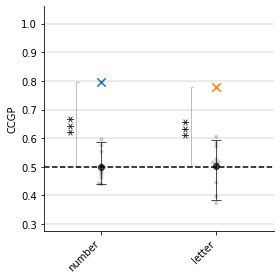

In [14]:
# Similar interfaces are exposed for cross-condition performance

mydec.CCGP_dichotomy(number_dichotomy, ntrials=1, only_semantic=True)

mydec.semantic_CCGP(ntrials=1, nshuffles=10, plot=True)



### Geometry analysis
Decodanda exposes a all-inclusive function that analyzes the geometrical properties of the session.\
 \
This includes **decoding** (semantic and XOR), **CCGP**, **parallelism score** , **Squarity**, and **Planarity**

0.8572197682944536

Testing CCGP for semantic dichotomy:  number
[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.802
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Performance: 0.799
		(1A) | (1B) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.779
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Performance: 0.805
		(1A) | (1B) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.791
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Performance: 0.775
		(1A) | (1B) 

		[CCGP_with_nullmodel]		----- Data: <p> = 0.79 -----

		[CCGP_with_nullmodel]		----- Random model iteration: 0 out of 10, <p

		[decode_with_nullmodel]		----- Random model iteration: 7 out of 10, <p> = 0.50 -----
		[decode_with_nullmodel]		----- Random model iteration: 8 out of 10, <p> = 0.48 -----
		[decode_with_nullmodel]		----- Random model iteration: 9 out of 10, <p> = 0.51 -----
		[decode_with_nullmodel]		----- Random model iteration: 10 out of 10, <p> = 0.51 -----
[decode_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains - iteration 1 of 10
		(1B) (2A)
			vs.				Performance: 0.511
		(1A) (2B)

[decode_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains - iteration 2 of 10
		(1B) (2A)
			vs.				Performance: 0.543
		(1A) (2B)

[decode_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains - iteration 3 of 10
		(1B) (2A)
			vs.				Performance: 0.544
		(1A) (2B)

[decode_dichotomy] Decoding with 857 time bins for 150 neurons from 1 brains - iteration 4 of 10
		(1B) (2A)
			vs.				Performance: 0.515
		(1A) (2B)

[decode_dichotomy] Decoding with 857 time bins 

({'Squore': 0.8572197682944536,
  'Parallel': {'number': 0.916094979341887, 'letter': 0.9137263208446903},
  'CCGP': {'number': 0.7918125243096071, 'letter': 0.7673084402956049},
  'Planarity': 0.5718060534970218,
  'Decoding': {'number': 0.8238331388564761,
   'letter': 0.793757292882147,
   'XOR': 0.5242415402567094}},
 {'Squore': [-0.12196634264520963,
   -0.12593840815274976,
   0.013021862009773228,
   -0.002618672229135955,
   -0.07915657170079975,
   -0.07509044662602403,
   -0.08014345970102085,
   -0.04866910531283165,
   -0.15693421123245155,
   -0.1304490281933433],
  'Parallel': {'number': [-0.014407938503930212,
    -0.02261589204669705,
    -0.083993326503646,
    0.08314861151070325,
    -0.01627900241325362,
    -0.06898207472055623,
    -0.017542092161067578,
    -0.03790399846876682,
    -0.1612046587926306,
    -0.026413667207196703],
   'letter': [-0.05106571908128849,
    0.06920460797570159,
    -0.058622436325471435,
    0.13652475895526187,
    -0.06995396278641

/Users/lorenzo/Desktop/Research/Other/PythonEnvs/decodanda/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


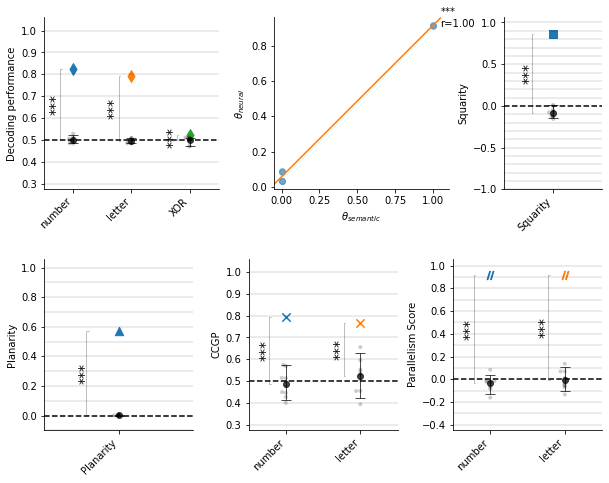

In [15]:
# And finally, the grand geometry analysis routine

mydec.geometry_analysis(training_fraction=0.7, nshuffles=10, plot=True)



/Users/lorenzo/Desktop/Research/Fusi Lab/decodanda/decodanda/utilities.py:209: ComplexWarning: Casting complex values to real discards the imaginary part
  self.raster[i, :] = np.dot(self.raster[i, :], M)


		[Decodanda]	building conditioned rasters for session SessioneFinta1.0
			(number = 1, letter = A):	Selected 660 time bin out of 3000, divided into 37 trials 
			(number = 1, letter = B):	Selected 677 time bin out of 3000, divided into 38 trials 
			(number = 2, letter = A):	Selected 820 time bin out of 3000, divided into 46 trials 
			(number = 2, letter = B):	Selected 843 time bin out of 3000, divided into 49 trials 


-0.35527293564872237

Testing CCGP for semantic dichotomy:  number
[CCGP_dichotomy] Decoding with 843 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.428
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 843 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Performance: 0.653
		(1A) | (1B) 

[CCGP_dichotomy] Decoding with 843 time bins for 150 neurons from 1 brains
		(2B) | (2A) 
			vs.				Performance: 0.474
		(1B) | (1A) 

[CCGP_dichotomy] Decoding with 843 time bins for 150 neurons from 1 brains
		(2A) | (2B) 
			vs.				Pe

		[decode_with_nullmodel]		----- Random model iteration: 3 out of 10, <p> = 0.48 -----
		[decode_with_nullmodel]		----- Random model iteration: 4 out of 10, <p> = 0.51 -----
		[decode_with_nullmodel]		----- Random model iteration: 5 out of 10, <p> = 0.52 -----
		[decode_with_nullmodel]		----- Random model iteration: 6 out of 10, <p> = 0.49 -----
		[decode_with_nullmodel]		----- Random model iteration: 7 out of 10, <p> = 0.47 -----
		[decode_with_nullmodel]		----- Random model iteration: 8 out of 10, <p> = 0.51 -----
		[decode_with_nullmodel]		----- Random model iteration: 9 out of 10, <p> = 0.50 -----
		[decode_with_nullmodel]		----- Random model iteration: 10 out of 10, <p> = 0.50 -----
[decode_dichotomy] Decoding with 843 time bins for 150 neurons from 1 brains - iteration 1 of 10
		(1B) (2A)
			vs.				Performance: 0.993
		(1A) (2B)

[decode_dichotomy] Decoding with 843 time bins for 150 neurons from 1 brains - iteration 2 of 10
		(1B) (2A)
			vs.				Performance: 0.988
		(1A) (2B)

[

({'Squore': -0.35527293564872237,
  'Parallel': {'number': 0.09208808958644403, 'letter': 0.10035477730472755},
  'CCGP': {'number': 0.563958086200079, 'letter': 0.6272241992882562},
  'Planarity': 0.004175249936592018,
  'Decoding': {'number': 0.9940984578884935,
   'letter': 0.9975978647686834,
   'XOR': 0.992526690391459}},
 {'Squore': [-0.13676345036447526,
   0.02201468413137484,
   -0.151276468471961,
   0.005414549680394424,
   -0.09199438840521544,
   -0.13223298156802485,
   -0.07628339995642418,
   -0.13207803560557227,
   -0.1386563376192157,
   -0.13398416725505014],
  'Parallel': {'number': [0.06255762742415352,
    -0.019922123075240925,
    0.048893959453764305,
    -0.004986605973686181,
    -0.09106329770441843,
    0.02738206830260168,
    0.08923374998646987,
    -0.12380301210594079,
    -0.05610985663726654,
    -0.012271740909177086],
   'letter': [0.031961772771388744,
    -0.014782490942686724,
    -0.26060537601473976,
    -0.05029633581958975,
    0.0308442385

/Users/lorenzo/Desktop/Research/Other/PythonEnvs/decodanda/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


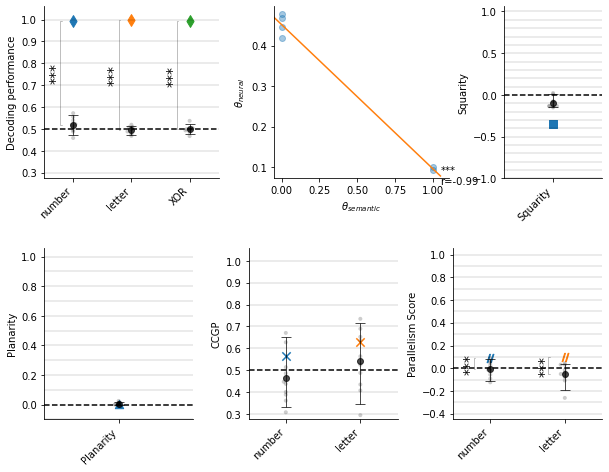

In [16]:
# Let's compare the geometry to a high-dimensional version of the session

s2 = FakeSession(n_neurons=150,
                 ndata=3000,
                 noise_amplitude=0.05,
                 coding_fraction=0.3,
                 rotate=True,
                 symplex=True)

mydec2 = Decodanda(sessions=s2, semantic_conditions=conditions, verbose=True, neural_attr='raster')

mydec2.geometry_analysis(training_fraction=0.7, nshuffles=10, plot=True)
